In [141]:
# 1. 데이터 로드 및 초기 설정
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 로드
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 인덱스 설정 (필수 열 'Id'를 남겨둡니다)
train_df.set_index('Id', inplace=False)
test_df.set_index('Id', inplace=False)

# 데이터 크기 확인
print(f"Train 데이터 수: {len(train_df)}, Test 데이터 수: {len(test_df)}")

Train 데이터 수: 1460, Test 데이터 수: 1459


In [143]:
# 2. 데이터 전처리
# 숫자형 데이터만 선택 (Id 열을 유지)
train_df_numeric = train_df.select_dtypes(include=[np.number])
test_df_numeric = test_df.select_dtypes(include=[np.number])

# 결측값 처리 (평균값으로 대체)
train_df_numeric.fillna(train_df_numeric.mean(), inplace=True)
test_df_numeric.fillna(test_df_numeric.mean(), inplace=True)

# 상관 행렬 계산
corrmat = train_df_numeric.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"]) >= 0.3]

# 상관계수가 높은 변수들 확인
print(top_corr_features)

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')


C:\Users\ranes\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ranes\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


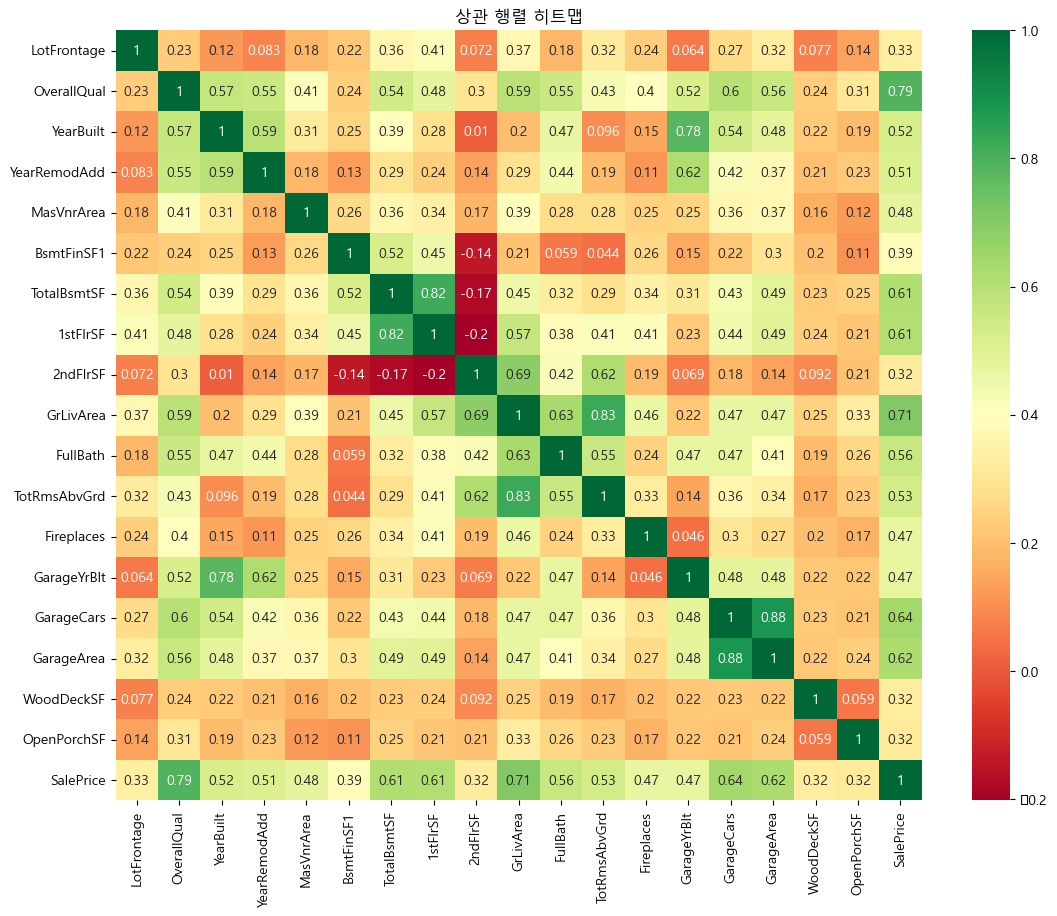

In [145]:
#3. 히트맵 시각화
# 히트맵 그리기
plt.figure(figsize=(13, 10))
sns.heatmap(train_df_numeric[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title('상관 행렬 히트맵')
plt.show()

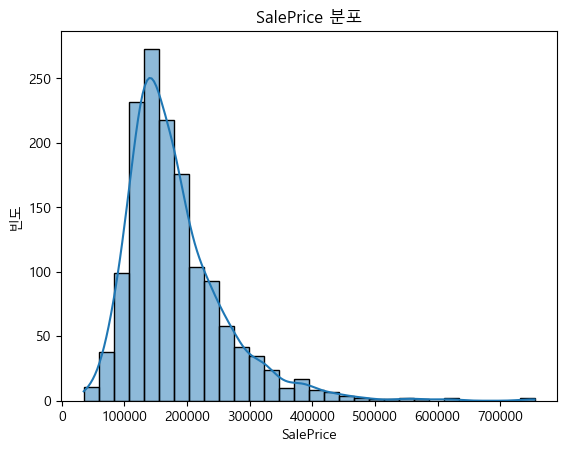

In [147]:
# 4.추가 시각화
# 4.1 SalePrice 분포 시각화
sns.histplot(train_df_numeric['SalePrice'], kde=True, bins=30)
plt.title('SalePrice 분포')
plt.xlabel('SalePrice')
plt.ylabel('빈도')
plt.show()

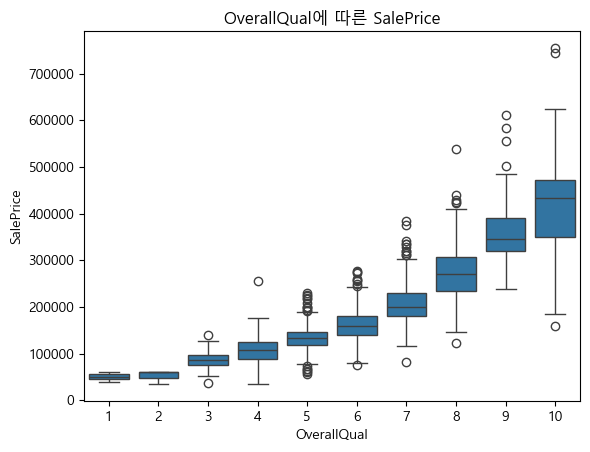

In [149]:
# 4.2 OverQual vs SalePrice
sns.boxplot(x=train_df['OverallQual'], y=train_df['SalePrice'])
plt.title('OverallQual에 따른 SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

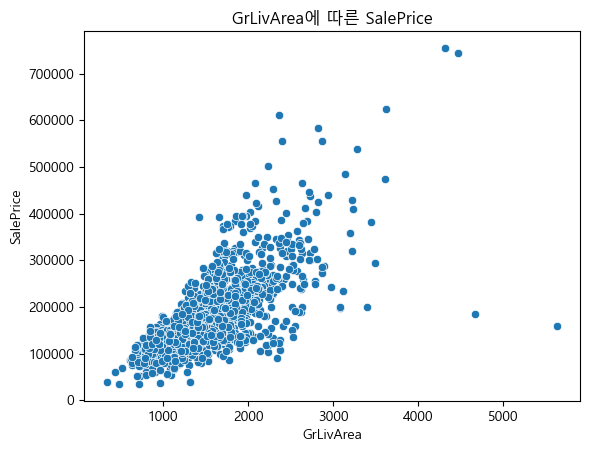

In [151]:
# 4.3 GrLivArea vs SalePrice
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title('GrLivArea에 따른 SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

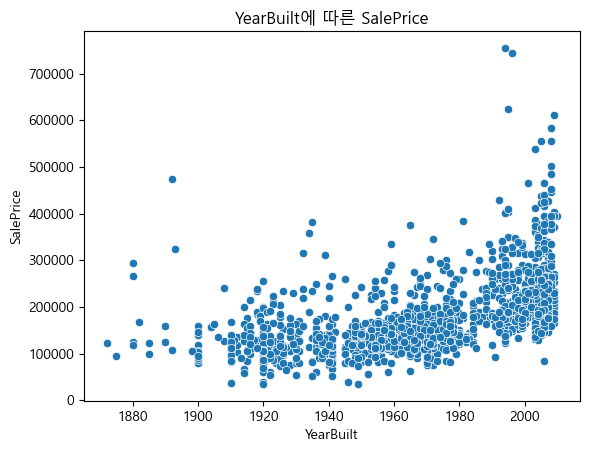

In [153]:
# 4.4. YearBuilt vs SalePrice
sns.scatterplot(x=train_df['YearBuilt'], y=train_df['SalePrice'])
plt.title('YearBuilt에 따른 SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [155]:
# 5.모델 구축 및 학습
# 독립 변수와 종속 변수 설정
X = train_df_numeric[top_corr_features].drop('SalePrice', axis=1)
y = train_df_numeric['SalePrice']

# 학습 데이터와 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_df_scaled = scaler.transform(test_df_numeric[top_corr_features.drop('SalePrice')])

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

RMSE: 37864.40438674611
R^2: 0.8130831621972423


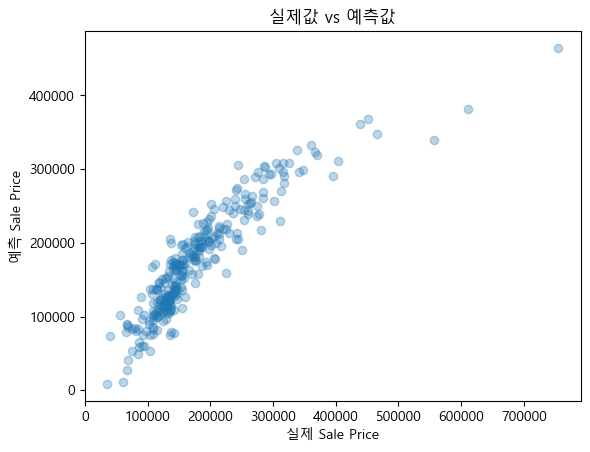

In [157]:
# 6. 모델 평가
# 예측값 계산
y_pred = model.predict(X_val)

# 평가 지표 계산
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# 예측값과 실제값 시각화
plt.scatter(y_val, y_pred, alpha=0.3)
plt.xlabel("실제 Sale Price")
plt.ylabel("예측 Sale Price")
plt.title("실제값 vs 예측값")
plt.show()

In [159]:
# 7. 테스트 데이터에 대한 예측 및 결과 저장
# 테스트 데이터 예측
test_predictions = model.predict(test_df_scaled)

# Id 열을 포함하여 제출 파일 생성
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

print("Submission 파일이 'submission.csv'로 저장되었습니다.")

Submission 파일이 'submission.csv'로 저장되었습니다.


In [161]:
from IPython.display import FileLink

# 다운로드 링크 생성
display(FileLink('submission.csv'))

C:\Users\ranes\house-prices-advanced-regression-techniques\submission.csv